In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
import xgboost as xgb

#Individual level data 

In [0]:
df = pd.read_csv('/content/client_individual.csv', delimiter=',') #User-Session level conversion file
df.shape
df.head()
df=df.dropna()

In [0]:
df.dtypes

sl_userid                object
sl_sessionid             object
fullReferrer             object
campaign                 object
medium                   object
channelGrouping          object
userType                 object
adContent                object
avg_bounce_rate         float64
operatingSystem          object
browser                  object
deviceCategory           object
region                   object
metro                    object
city                     object
latitude                float64
longitude               float64
networkLocation          object
regionIsoCode            object
avg_pricing_duration    float64
pagePath                  int64
dtype: object

# Correlation

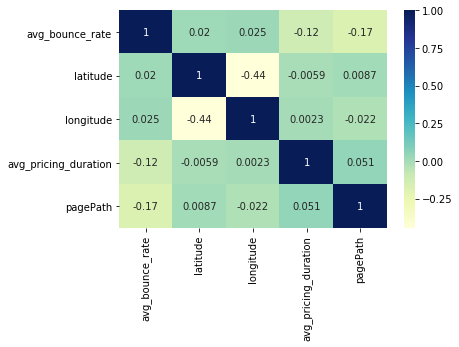

In [0]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

This gives correlation between only continuous variables. 

# Setting up x and y

In [0]:
y = df['pagePath']
x = df[['avg_bounce_rate', 'avg_pricing_duration','fullReferrer','channelGrouping', 'userType', 'deviceCategory', 'city', 'networkLocation']]
y.value_counts()*100/len(y) 

0    97.509907
1     2.490093
Name: pagePath, dtype: float64

This is a imbalanced dataset,with the minority class being just 2.4% 

In [0]:
X=pd.get_dummies(x,drop_first=True)   # converting categorical variables to dummy variables

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)  

Using 'stratify' to split into test and train dataset because it is a imbalanced dataset

# Logistic Regression

### Choosing between different models: Here below there are 4 models : 
1. logistic regression model of threshold = 0.3
2. logistic regression with l1 regularisation  and threshold = 0.3
3. logistic regression with class weight = 'balanced'  and threshold = 0.5
4. logistic regression with l1 regularisation,class weight = 'balanced'  and threshold = 0.5

In [0]:
lr_clf = LogisticRegression(random_state=42)
lr_clf_reg = LogisticRegression(random_state=42,penalty='l1')
lr_clf_bal = LogisticRegression(random_state=42,class_weight='balanced')
lr_clf_bal_reg = LogisticRegression(random_state=42,class_weight='balanced',penalty='l1')

lr_clf.fit(x_train, y_train)
lr_clf_reg.fit(x_train,y_train)
lr_clf_bal.fit(x_train,y_train)
lr_clf_bal_reg.fit(x_train,y_train)

y_pred_prob_tr = lr_clf.predict_proba(x_train)
y_pred_prob1_tr = lr_clf_reg.predict_proba(x_train)
y_pred_prob2_tr = lr_clf_bal.predict_proba(x_train)
y_pred_prob3_tr = lr_clf_bal_reg.predict_proba(x_train)

y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob1 = lr_clf_reg.predict_proba(x_test)
y_pred_prob2 = lr_clf_bal.predict_proba(x_test)
y_pred_prob3 = lr_clf_bal_reg.predict_proba(x_test)

In [0]:
y_pred_tr=np.where(y_pred_prob_tr[:,1]>0.3,1,0)
y_pred1_tr=np.where(y_pred_prob1_tr[:,1]>0.3,1,0)
y_pred2_tr=np.where(y_pred_prob2_tr[:,1]>0.5,1,0)
y_pred3_tr=np.where(y_pred_prob3_tr[:,1]>0.5,1,0)


y_pred=np.where(y_pred_prob[:,1]>0.3,1,0)
y_pred1=np.where(y_pred_prob1[:,1]>0.3,1,0)
y_pred2=np.where(y_pred_prob2[:,1]>0.5,1,0)
y_pred3=np.where(y_pred_prob3[:,1]>0.5,1,0)

print('----------------------------------------normal model------------------------------------------------------')
#normal model
#train
print("Classification report for normal model - train ")
print("F1 Score: ", f1_score(y_train, y_pred_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_tr[:,1]))
print()
print(classification_report(y_train, y_pred_tr))

#test
print("Classification report for normal model - test ")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

print('----------------------------------------l2 regularized model------------------------------------------------------')

#l2 regularized model
#train
print("Classification report for reg model - train ")
print("F1 Score: ", f1_score(y_train, y_pred1_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob1_tr[:,1]))
print()
print(classification_report(y_train, y_pred1_tr))

#test
print("Classification report for reg model- test ")
print("F1 Score: ", f1_score(y_test, y_pred1))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob1[:,1]))
print()
print(classification_report(y_test, y_pred1))



----------------------------------------normal model------------------------------------------------------
Classification report for normal model - train 
F1 Score:  0.42836468885672935
AUROC:  0.9537024127543069

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     57015
           1       0.45      0.41      0.43      1456

    accuracy                           0.97     58471
   macro avg       0.72      0.70      0.71     58471
weighted avg       0.97      0.97      0.97     58471

Classification report for normal model - test 
F1 Score:  0.367986798679868
AUROC:  0.9419473514801616

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     24436
           1       0.38      0.36      0.37       624

    accuracy                           0.97     25060
   macro avg       0.68      0.67      0.68     25060
weighted avg       0.97      0.97      0.97     25060

----------------------------

In [0]:
print('----------------------------------------balanced model------------------------------------------------------')

# balanced model
#train
print("Classification report for balanced model- train ")
print("F1 Score: ", f1_score(y_train, y_pred2_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob2_tr[:,1]))
print()
print(classification_report(y_train, y_pred2_tr))

#test
print("Classification report for balanced model- test")
print("F1 Score: ", f1_score(y_test, y_pred2))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob2[:,1]))
print()
print(classification_report(y_test, y_pred2))

print('----------------------------------------balanced - l2 reg model------------------------------------------------------')

#balanced - l2 reg model
#train
print("Classification report for balanced reg model- train")
print("F1 Score: ", f1_score(y_train, y_pred3_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob3_tr[:,1]))
print()
print(classification_report(y_train, y_pred3_tr))

#test
print("Classification report for balanced reg model - test ")
print("F1 Score: ", f1_score(y_test, y_pred3))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob3[:,1]))
print()
print(classification_report(y_test, y_pred3))

----------------------------------------balanced model------------------------------------------------------
Classification report for balanced model- train 
F1 Score:  0.30546839982070817
AUROC:  0.9613775907728157

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     57015
           1       0.18      0.94      0.31      1456

    accuracy                           0.89     58471
   macro avg       0.59      0.91      0.62     58471
weighted avg       0.98      0.89      0.93     58471

Classification report for balanced model- test
F1 Score:  0.2791299844640083
AUROC:  0.9428042471490152

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     24436
           1       0.17      0.86      0.28       624

    accuracy                           0.89     25060
   macro avg       0.58      0.88      0.61     25060
weighted avg       0.98      0.89      0.92     25060

------------------------

The best model is one which is class_weight as balanced and has a threshold of 0.5. It has a recall of 0.86 and precision of 0.17 for test data.

# Feature importance

In [0]:
#the reg bal model
weights = Series(lr_clf_bal_reg.coef_[0],
                 index=x_train.columns.values)
weights.sort_values()
weights2 = DataFrame(dict(weights = weights, weights_abs = weights.abs()))
weights2=weights2.sort_values(by='weights_abs',ascending=False)
weights2.head()

,weights,weights_abs
networkLocation_amanah tech inc.,8.184245,8.184245
networkLocation_abilene christian university,8.065592,8.065592
fullReferrer_mychariotenergy.sharepoint.com/_layouts/15/sharepoint.aspx,7.796089,7.796089
fullReferrer_d2a952y4d7suw.cloudfront.net/,7.373207,7.373207
fullReferrer_powertochose.org/en-us/Plan/Results,6.807051,6.807051


This seems to be right when looked at % of conversions from these.

In [0]:
print("Total number of features:", len(weights2['weights_abs']))
print("Number of non-zero weight features is:", (weights2['weights_abs']>0).sum())

Total number of features: 3757
Number of non-zero weight features is: 367


In [0]:
weights2.to_csv('weights2.csv')

# Random Forest

In [0]:
rf_clf = RandomForestClassifier(random_state=70)
rf_clf_bal = RandomForestClassifier(class_weight='balanced',random_state=70)

rf_clf.fit(x_train, y_train)
rf_clf_bal.fit(x_train, y_train)

y_pred_prob = rf_clf.predict_proba(x_test)
y_pred_prob1 = rf_clf_bal.predict_proba(x_test)

In [0]:
y_pred=np.where(y_pred_prob[:,1]>0.3,1,0)
y_pred1=np.where(y_pred_prob1[:,1]>0.3,1,0) #lowered the threshold

#normal model
print("Classification report for normal RF classifier")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

#balanced model
print("Classification report for balanced RF classifier")
print("F1 Score: ", f1_score(y_test, y_pred1))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob1[:,1]))
print()
print(classification_report(y_test, y_pred1))

Classification report for normal RF classifier
F1 Score:  0.5058139534883721
AUROC:  0.9046413039714418

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     24436
           1       0.46      0.56      0.51       624

    accuracy                           0.97     25060
   macro avg       0.73      0.77      0.75     25060
weighted avg       0.98      0.97      0.97     25060

Classification report for balanced RF classifier
F1 Score:  0.4698275862068965
AUROC:  0.9026859409824093

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     24436
           1       0.35      0.70      0.47       624

    accuracy                           0.96     25060
   macro avg       0.67      0.83      0.72     25060
weighted avg       0.98      0.96      0.97     25060



Balanced has a higher recall

# Tuning it further

In [0]:
tuned_parameters = [{'n_estimators':[10,20,50],
                     'max_depth':[5,10]}]
clf1 = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf1.fit(x_train, y_train)
print(clf1.best_params_)

{'max_depth': 5, 'n_estimators': 10}


In [0]:
rf_clf1 = RandomForestClassifier(max_depth= 5,n_estimators= 10,class_weight='balanced',random_state=42)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [0]:
y_pred_prob = rf_clf1.predict_proba(x_test)
y_pred=np.where(y_pred_prob[:,1]>0.5,1,0)

In [0]:
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

F1 Score:  0.14703321308620476
AUROC:  0.899349025554982

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     24436
           1       0.08      0.95      0.15       624

    accuracy                           0.73     25060
   macro avg       0.54      0.83      0.49     25060
weighted avg       0.98      0.73      0.82     25060



The tuned model is doing worse-off in precision but has a high recall.

# Get Feature Importance for RF

In [0]:
#balanced model before tuning
#feature_importances = pd.DataFrame(rf_clf_bal.feature_importances_,
#                                   index = x_train.columns,
#                                    columns=['importance']).sort_values('importance',ascending=False)
feat_importances = pd.Series(rf_clf_bal.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False).head(10) 
                                  

avg_pricing_duration                                 0.142756
avg_bounce_rate                                      0.141076
channelGrouping_Referral                             0.092007
deviceCategory_mobile                                0.047856
fullReferrer_powertochoose.org/en-us/Plan/Results    0.043011
city_Nashville                                       0.026985
networkLocation_grande communications austin         0.026232
channelGrouping_Display                              0.025241
city_Houston                                         0.023950
userType_Returning Visitor                           0.022105
dtype: float64